# Introduction

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

# Hypothesis

Independent Variables:

Loan_ID - Id provided to applicant while processing loan

Gender - Gender of applicant male/female

Married - Marrital status

Dependents - How many dependents the applicant is having

Education - Education Background

Self_Employed -  having own business 

ApplicantIncome - Primary customer applying for the loan

CoapplicantIncome - another person whose income will also been shown jointly with applicant income so that loan amount
                    will be increased or will not face an issue (Secondary customer)

Loan_Amount - How much amount has been approved by bank

Loan_Amount_Term - For what period loan will be approved

Credit History - Customer credit score

Property_Area - What are the areas loan has been applied and approved like rural, semiurban and urban

Dependent Variable

Loan_Status - On the basis of this we need to predict our model as customer is applicable for loan or not


In [1]:
# Importng important libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

In [45]:
pd. set_option("display.max_rows", None)

In [2]:
df = pd.read_csv("/Users/juhimishra/Downloads/DSData-master 3/loan_prediction.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# EDA

In [3]:
print("Total Rows: ", df.shape[0])
print("Total Columns: ",df.shape[1])

Total Rows:  614
Total Columns:  13


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Here with helo of info we can see that there are lot many object and missing values are there so need to fix the same

In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


List of observations as per above static data:
1. There are missing values in Loan amount column, Loan Amount Term Column and Credit History column.
2. There are columns where we see that difference between mean and std are high which means there is a possibility
   of skewness and outliers. as quantile data are also having diffrences which are unusual . Will check through other
    methods too.
3. Loan amount term and Credit history here are a categorical column as we can see quantile data are fixed here not continous.

In [6]:
df.isna().sum().to_frame('Missing values')

,Missing values
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


Above with the help of describe method we only got continous missing data while with the help of isna we can see that even
in object data too missing values are present. So will fix using mean / median/ mode/Imputation method as per the requirement.

# Feature Engineering

In [27]:
# Filling object data using mode method
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mode()[0])
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])


In [24]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())

In [28]:
df.isna().sum().to_frame('Missing Values')

,Missing Values
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


No missing values

In [7]:
# Dropped Loan_ID column as it will not affect much my prediction part for loan_status
df.drop('Loan_ID',axis=1,inplace =True)

In [8]:
df['Credit_History'].unique()

array([ 1.,  0., nan])

In [9]:
df['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [10]:
df["Dependents"].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [11]:
df['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [12]:
df['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [13]:
df['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [14]:
df['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [15]:
df['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [16]:
df['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [32]:
df['Loan_Status']=df['Loan_Status'].replace({'Y':1,'N':0})

# Visualization Analysis

<AxesSubplot:xlabel='Gender', ylabel='count'>

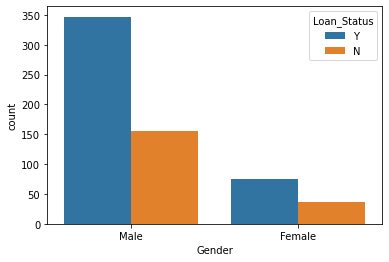

In [29]:
sns.countplot(x = 'Gender',hue = 'Loan_Status',data = df)

Here with the count plot help we can see that compare to female male has applied more for loan and acrodingly loan has been approved

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Loan_Status'>

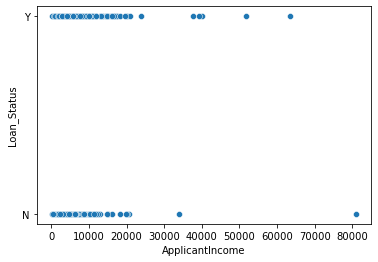

In [19]:

sns.scatterplot(x='ApplicantIncome',y ='Loan_Status',data=df)


Mostly income lies between 10k - 20k has applied a lot for loan and as per their background and credit history loan has 
been approved . Mostly people above 30k has got positive reply for loan as we can see with the help of scatter plot. Also 
we can observe one uncertain thing that income above 80k loan has not been approved . We can assume either bank is giving loan
to low or medium earning people or got some information unexpected or not upto the mark as per the bank guidelines

<AxesSubplot:xlabel='LoanAmount', ylabel='Loan_Status'>

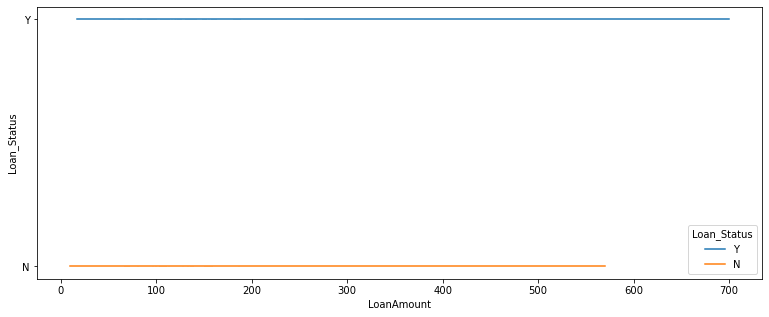

In [20]:
plt.figure(figsize=(13,5))
sns.lineplot(x= 'LoanAmount',y ='Loan_Status', hue ='Loan_Status',data=df)

From here we can observe that min loan is amount is having no limit but for max loan approval is below 600 

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

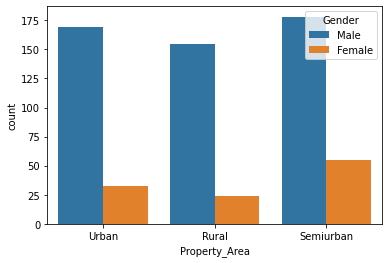

In [30]:
sns.countplot(x = 'Property_Area',hue='Gender',data = df)

male and female oth from semiurban area are applying more in number compare to urban and rural in which rural applies less
may be due to lack of knowledge or reach

<AxesSubplot:xlabel='Property_Area', ylabel='Loan_Status'>

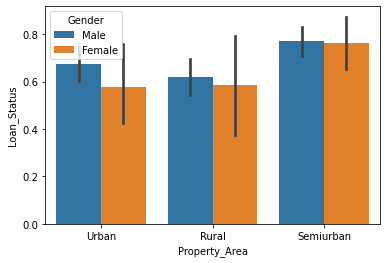

In [33]:
sns.barplot(x = 'Property_Area',y='Loan_Status',hue='Gender',data = df)

As above we seen that application from semiurban is more so even loan approval is also higher in semiurban area 

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

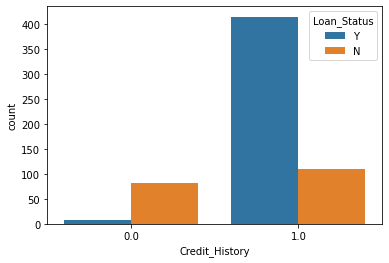

In [31]:
sns.countplot(x = 'Credit_History',hue = 'Loan_Status',data = df)

Here we can see that customer having good credit score are getting more approval for loan bur also concluded that with less
credit score too few customers are getting loan whic bank need to take care of 

In [35]:
# Checking The mean price of Hass Avacado year wis
df.groupby('Gender')['Loan_Status'].mean()

Gender
Female    0.669643
Male      0.691235
Name: Loan_Status, dtype: float64

Percentage of loan approve for both the gender are almost same 

In [37]:
df.groupby('Gender')['Loan_Status'].value_counts()

Gender  Loan_Status
Female  1               75
        0               37
Male    1              347
        0              155
Name: Loan_Status, dtype: int64

Even loan applied by female are less compare to male

In [39]:
# Checking The mean price of Hass Avacado year wis
df.groupby('ApplicantIncome')['LoanAmount'].mean()

ApplicantIncome
150      135.0
210       98.0
416      350.0
645      113.0
674      168.0
         ...  
39147    120.0
39999    600.0
51763    700.0
63337    490.0
81000    360.0
Name: LoanAmount, Length: 505, dtype: float64

applicant with less income are getting loan same as applicant with more income. There is no difference due to income of applicant. That means bank
are looking after good credit score and customer reputation in market. Same we can see through count below

In [41]:
df.groupby('ApplicantIncome')['LoanAmount'].value_counts().to_frame('Count')

,,Count
ApplicantIncome,LoanAmount,
150,135.0,1
210,98.0,1
416,350.0,1
645,113.0,1
674,168.0,1
...,...,...
39147,120.0,1
39999,600.0,1
51763,700.0,1


In [46]:
df.groupby('Property_Area')['LoanAmount'].value_counts().to_frame('Count')

Count
Property_Area LoanAmount       
Rural         120.000000      8
              110.000000      6
              146.412162      6
              112.000000      4
              113.000000      4
              130.000000      4
              135.000000      4
              185.000000      4
              187.000000      4
              66.000000       3
              95.000000       3
              125.000000      3
              132.000000      3
              138.000000      3
              150.000000      3
              152.000000      3
              155.000000      3
              180.000000      3
              55.000000       2
              81.000000       2
              100.000000      2
              105.000000      2
              107.000000      2
              108.000000      2
              124.000000      2
              126.000000      2
              129.000000      2
              133.000000      2
              140.000000      2
              151.000000      2
              157.000000      2
              160.000000      2
              165.000000      2
              170.000000      2
              172.000000      2
              175.000000      2
              182.000000      2
              194.000000      2
              480.000000      2
              40.000000       1
              42.000000       1
              46.000000       1
              48.000000       1
              56.000000       1
              58.000000       1
              61.000000       1
              65.000000       1
              67.000000       1
              71.000000       1
              80.000000       1
              84.000000       1
              87.000000       1
              89.000000       1
              90.000000       1
              93.000000       1
              101.000000      1
              104.000000      1
              106.000000      1
              109.000000      1
              114.000000      1
              115.000000      1
              116.000000      1
              118.000000      1
              119.000000      1
              121.000000      1
              123.000000      1
              128.000000      1
              131.000000      1
              136.000000      1
              139.000000      1
              141.000000      1
              142.000000      1
              144.000000      1
              145.000000      1
              146.000000      1
              149.000000      1
              153.000000      1
              154.000000      1
              158.000000      1
              159.000000      1
              162.000000      1
              168.000000      1
              173.000000      1
              176.000000      1
              188.000000      1
              200.000000      1
              209.000000      1
              211.000000      1
              216.000000      1
              218.000000      1
              225.000000      1
              243.000000      1
              255.000000      1
              275.000000      1
              300.000000      1
              304.000000      1
              308.000000      1
              311.000000      1
              320.000000      1
              360.000000      1
              370.000000      1
              376.000000      1
              380.000000      1
              400.000000      1
              570.000000      1
Semiurban     96.000000       6
              128.000000      6
              100.000000      5
              115.000000      5
              120.000000      5
              146.412162      5
              70.000000       4
              98.000000       4
              116.000000      4
              130.000000      4
              132.000000      4
              150.000000      4
              160.000000      4
              175.000000      4
              187.000000      4
              81.000000       3
              94.000000       3
              95.000000       3
              99.000000   

Here with the help of count we can see that Urban area customers are applying for more loan amount followed by Rural Customers.


In [47]:
df["Dependents"]=df["Dependents"].replace({'0':0,'1':1,'2':2,'3+':3})
df['Gender']=df['Gender'].replace({'Male':1,'Female':0})
df['Married']=df['Married'].replace({'No':0,'Yes':1})
df['Education']=df['Education'].replace({'Graduate':1,'Not Graduate':0})
df['Self_Employed']=df['Self_Employed'].replace({'No':0,'Yes':1})
df['Property_Area']=df['Property_Area'].replace({'Urban':0,'Rural':1,'Semiurban':2})


Transformed all string / object form data to numeric data for further process

In [48]:
df.tail()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,1,1
610,1,1,3,1,0,4106,0.0,40.0,180.0,1.0,1,1
611,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,0,1
612,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,0,1
613,0,0,0,1,1,4583,0.0,133.0,360.0,0.0,2,0


# Checking Balanced data or imbalanced

In [49]:
df['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

# Checking Skewness

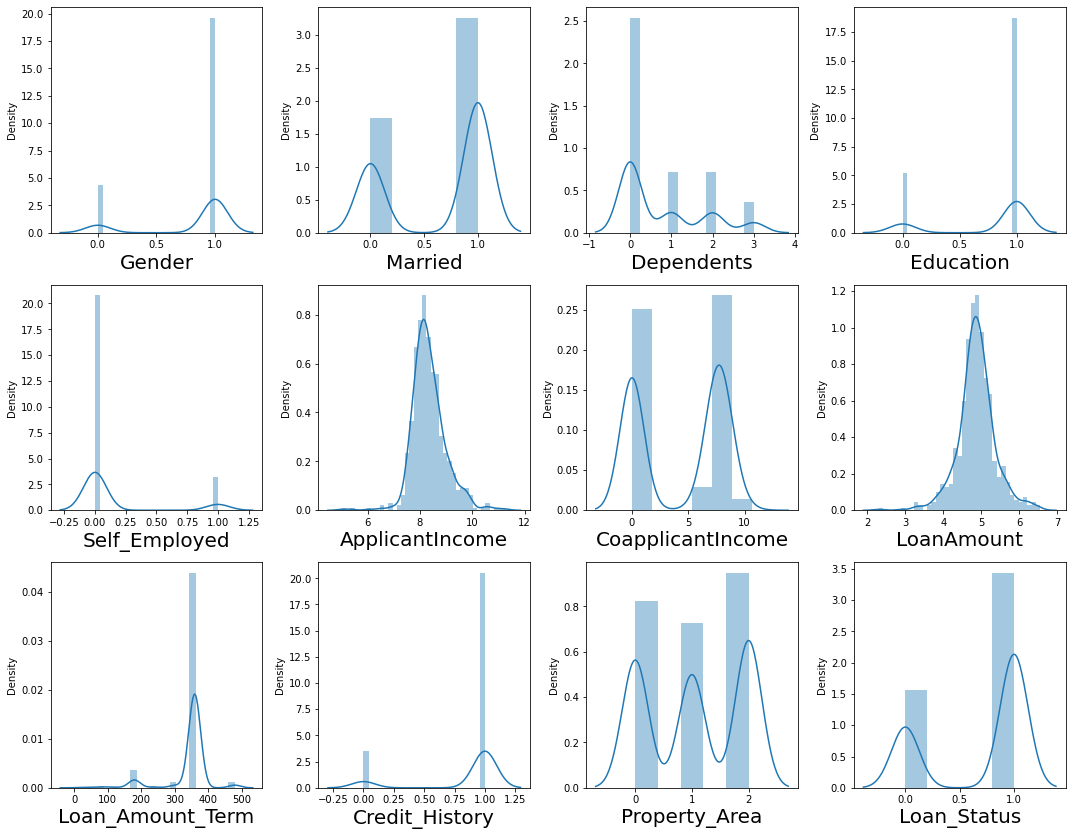

In [105]:
plt.figure(figsize = (15,15),facecolor = 'white')
plotnumber = 1

for column in df:
    if plotnumber <=16:
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 20)
        
    plotnumber+=1
plt.tight_layout()

With the help of graph we cann see that our continous data are right skewed and we need to fix the same by using zscore or quantile method. By mistake clicked after removing skewness so it's not showing right skewed but prior our continous data were right skewed data. Pls consider the same. As treatment done accordingly below

In [51]:
df.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education           -1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.095601
Loan_Status         -0.809998
dtype: float64

In [54]:
skew = ['ApplicantIncome','CoapplicantIncome','LoanAmount']

As skewness are applied only on continous data so here will have three columns where we need to remove skewness, rest all 
columns are categorical columns and loan status is our target so we can't treat skewness for the same.

In [55]:
for col in skew:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [56]:
df.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education           -1.367622
Self_Employed        2.159796
ApplicantIncome      0.482128
CoapplicantIncome   -0.173073
LoanAmount          -0.179713
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.095601
Loan_Status         -0.809998
dtype: float64

as we used log1p transformation method for skewness so almost all the value is near to 0 which is good for our model bulding as 
best skew value for normal distribution is near to 0

# Locating Outliers

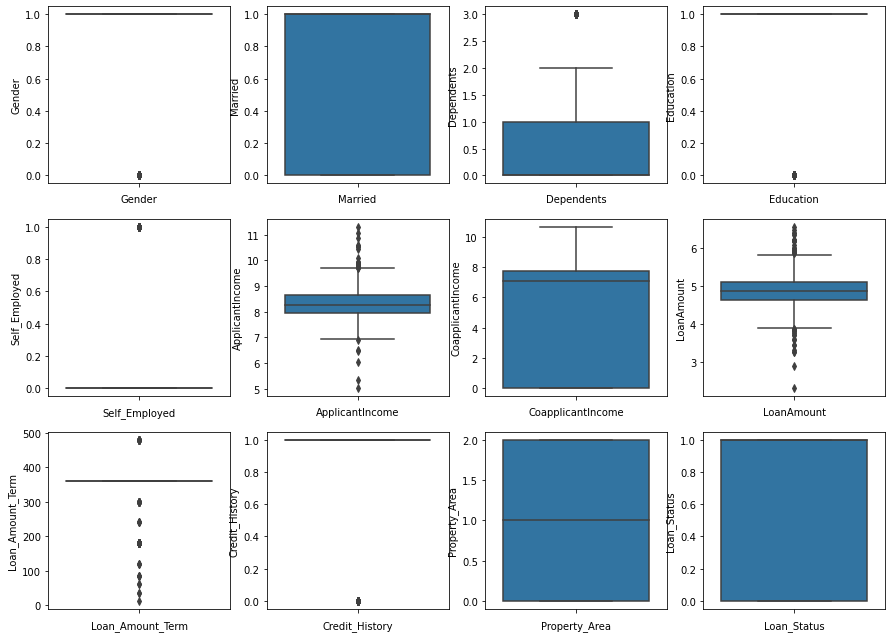

In [60]:
# Let's check outliers 
plt.figure(figsize=(15,15))

graph=1

for column in df.columns:
    if graph<=16:
        ax = plt.subplot(4,4,graph)
        sns.boxplot(y=df[column],orient='v') #orientation = v means vertical and if h that means horizontal
        plt.xlabel(column,fontsize=10)
    graph+=1
plt.show()

Outliers found in continous columns:
1. Applicant Income
2. Loan Amount
3. Having outliers in categorical columns too but generally no need to treat outliers for categorical columns

In [61]:
from scipy.stats import zscore

In [62]:
dfContCols = df[['ApplicantIncome','LoanAmount']]

In [63]:
# applying zscore on only the dataset which has continuous columns
z=np.abs(zscore(dfContCols))

df_new=df[(z<3).all(axis=1)]

In [64]:
print("shape before and after")
print("shape before".ljust(20),":", df.shape)
print("shape after".ljust(20),":", df_new.shape)
print("Percentage Loss".ljust(20),":", (df.shape[0]-df_new.shape[0])/df.shape[0])

shape before and after
shape before         : (614, 12)
shape after          : (596, 12)
Percentage Loss      : 0.029315960912052116


So our data loss is very less here and able to remove outliers from our dataset. And almost reduced the outlier present in data 

# Checking the correlation among features if any using code and heatmap

In [65]:
df_new.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.368363,0.188031,-0.051606,0.001734,0.052162,0.234191,0.160251,-0.075834,0.015235,-0.087966,0.012177
Married,0.368363,1.000000,0.339557,-0.017523,0.002312,0.005664,0.323635,0.190770,-0.102308,0.016326,-0.005158,0.091829
Dependents,0.188031,0.339557,1.000000,-0.061448,0.073637,0.123763,0.000210,0.144131,-0.091977,-0.024745,0.004942,0.012231
Education,-0.051606,-0.017523,-0.061448,1.000000,0.003297,0.177753,-0.040275,0.144097,0.078050,0.077036,0.010613,0.094231
Self_Employed,0.001734,0.002312,0.073637,0.003297,1.000000,0.198681,-0.088368,0.115637,-0.041687,-0.008653,0.013863,-0.017799
ApplicantIncome,0.052162,0.005664,0.123763,0.177753,0.198681,1.000000,-0.371625,0.494086,-0.044944,0.047392,0.008231,-0.007151
CoapplicantIncome,0.234191,0.323635,0.000210,-0.040275,-0.088368,-0.371625,1.000000,0.166138,0.007229,0.001582,0.013611,0.069419
LoanAmount,0.160251,0.190770,0.144131,0.144097,0.115637,0.494086,0.166138,1.000000,0.058542,0.001791,0.065334,-0.041298
Loan_Amount_Term,-0.075834,-0.102308,-0.091977,0.078050,-0.041687,-0.044944,0.007229,0.058542,1.000000,-0.006233,0.093972,-0.012378
Credit_History,0.015235,0.016326,-0.024745,0.077036,-0.008653,0.047392,0.001582,0.001791,-0.006233,1.000000,0.034513,0.552277


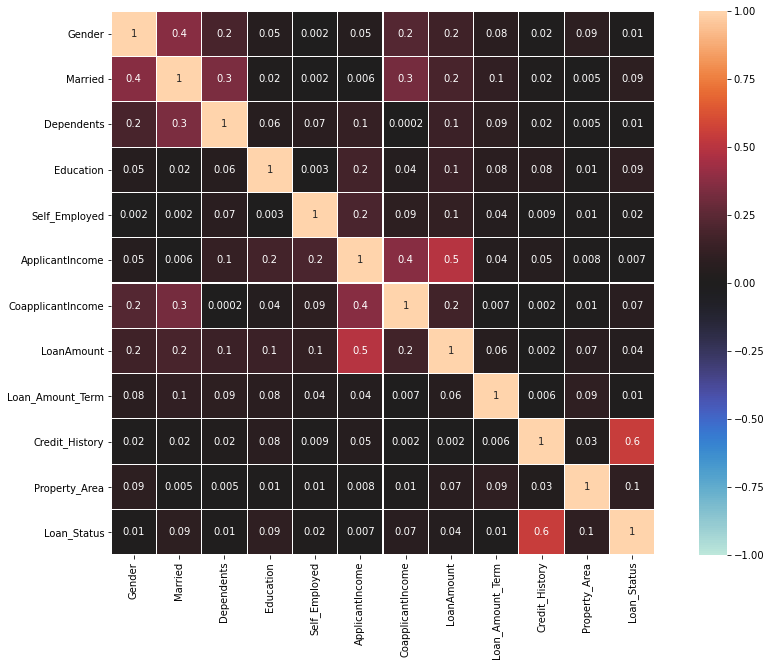

In [66]:
# Checking correlation with the help of heatmap
df_corr = df_new.corr().abs()

plt.figure(figsize = (16,10))
sns.heatmap(df_corr, vmin = -1,vmax = 1,annot=True,
           square = True,center = 0, fmt = '.1g',linewidths = .1,)
plt.show()


As we can see that there are less correlation between any feature so no need to remove any columns further. As here we can see that mostly no numbers are in negative and no positive numbers are greater than 1 

In [74]:
## Splitting target and feature variable into x and y
x = df_new.drop(columns=['Loan_Status'])
y= df_new['Loan_Status']

feature has been stored in x variable and target has been stored in y variable

In [75]:
x.shape

(596, 11)

In [76]:
y.shape

(596,)

In [71]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()


As ur data is imbalanced so need to balance the same and here we used oversampling because in under sampling will loose 
lot many data which will affect our model

In [77]:
x1,y1 = sm.fit_resample(x,y)

In [78]:
y1.value_counts()

1    410
0    410
Name: Loan_Status, dtype: int64

In [81]:
scaler = StandardScaler()
x_scaler = scaler.fit_transform(x1)
x_scaler

array([[ 0.47894186, -1.2727169 , -0.71127906, ...,  0.24977342,
         0.56260144, -1.17330133],
       [ 0.47894186,  0.78572069,  0.30483388, ...,  0.24977342,
         0.56260144,  0.03537592],
       [ 0.47894186,  0.78572069, -0.71127906, ...,  0.24977342,
         0.56260144, -1.17330133],
       ...,
       [-2.08793609, -1.2727169 ,  0.30483388, ...,  0.24977342,
         0.56260144,  0.03537592],
       [ 0.47894186, -1.2727169 , -0.71127906, ...,  0.24977342,
        -1.83282287,  0.03537592],
       [ 0.47894186, -1.2727169 , -0.71127906, ...,  0.24977342,
         0.56260144,  0.03537592]])

# Finding Best Random_State

In [83]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score

In [88]:
from sklearn.model_selection import cross_val_score

In [84]:

maxaccu = 0
maxrs = 0

for i in range(1,500):
    x1_train,x1_test,y1_train,y1_test = train_test_split(x_scaler,y1,test_size = 0.30,random_state = i)
    dt = DecisionTreeClassifier()
    dt.fit(x1_train,y1_train)
    pred = dt.predict(x1_test)
    acc = accuracy_score(y1_test,pred)
    if acc>maxaccu:
        maxaccu=acc
        maxrs=i
print("Best Accuracy score is:",maxaccu,"On Random state: ",maxrs)
        

Best Accuracy score is: 0.8130081300813008 On Random state:  234


In [85]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x_scaler,y1,random_state=maxrs,test_size=0.30)

In [86]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [87]:
DTC = DecisionTreeClassifier()
DTC.fit(x1_train,y1_train)
pred = DTC.predict(x1_test)
acc = classification_report(y1_test,pred)
print(acc)

              precision    recall  f1-score   support

           0       0.82      0.81      0.81       120
           1       0.82      0.83      0.82       126

    accuracy                           0.82       246
   macro avg       0.82      0.82      0.82       246
weighted avg       0.82      0.82      0.82       246



In [89]:
print(cross_val_score(DTC,x1,y1,cv=5).mean())

0.7597560975609756


In [90]:
RFC = RandomForestClassifier()
RFC.fit(x1_train,y1_train)
pred =RFC.predict(x1_test)
acc = classification_report(y1_test,pred)
print(acc)


              precision    recall  f1-score   support

           0       0.85      0.79      0.82       120
           1       0.81      0.87      0.84       126

    accuracy                           0.83       246
   macro avg       0.83      0.83      0.83       246
weighted avg       0.83      0.83      0.83       246



In [91]:
print(cross_val_score(RFC,x1,y1,cv=5).mean())

0.8024390243902438


In [92]:
SV = SVC()
SV.fit(x1_train,y1_train)
pred = SV.predict(x1_test)
acc = classification_report(y1_test,pred)
print(acc)

              precision    recall  f1-score   support

           0       0.84      0.68      0.75       120
           1       0.74      0.87      0.80       126

    accuracy                           0.78       246
   macro avg       0.79      0.78      0.78       246
weighted avg       0.79      0.78      0.78       246



In [93]:
print(cross_val_score(SV,x1,y1,cv=5).mean())

0.5134146341463415


Random Forest CV score is showing that RFC is our best model as differnce between Cv score and Accuracy score is less in
RandomForest Classfier so will do hyperparameter tuning for the same.

# Hyperparameter Tuning

In [99]:
# RandomForestClassifier
param = {'n_estimators':[100,200,500,700],
        'criterion':['gini','entropy'],
        'max_depth':[2,3,4,5,6,7,8],
        'max_features':['auto','sqrt','log2']}

In [100]:
GC = GridSearchCV(RFC,param,cv=5)

In [101]:
GC.fit(x1_train,y1_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 500, 700]})

In [102]:
GC.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'log2',
 'n_estimators': 500}

In [103]:
final_rfc = RandomForestClassifier(criterion = 'entropy',max_depth = 8, max_features = 'log2',n_estimators = 500)
final_rfc.fit(x1_train,y1_train)
pred = final_rfc.predict(x1_test)
acc = accuracy_score(pred,y1_test)
print(acc*100)

81.30081300813008


not much difference even after doing hyperparameter tuning for our model so best we got is 81% 

# Save the model

In [104]:
import joblib
joblib.dump(final_rfc,'FinalmodelLoanapplicantstatus.pk1')

['FinalmodelLoanapplicantstatus.pk1']